✅ File found!
🔥 Fire Detected!


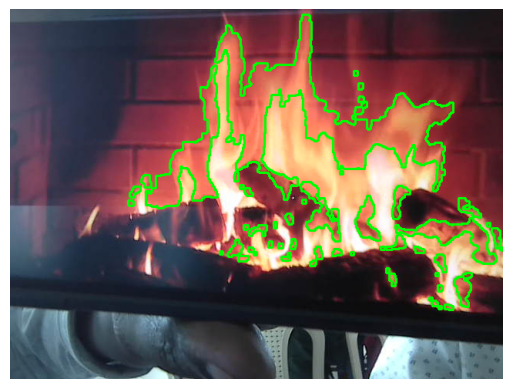

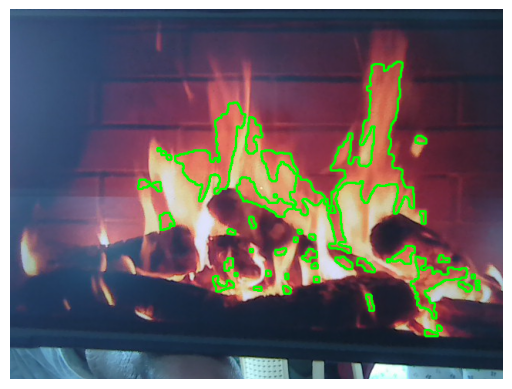

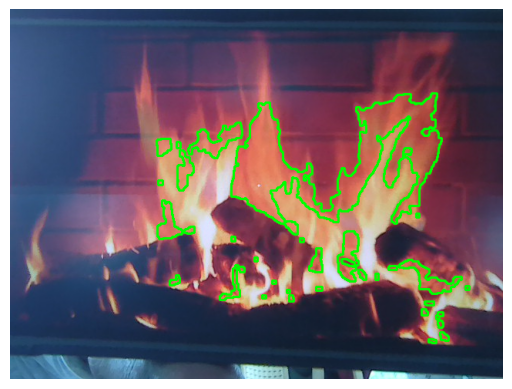

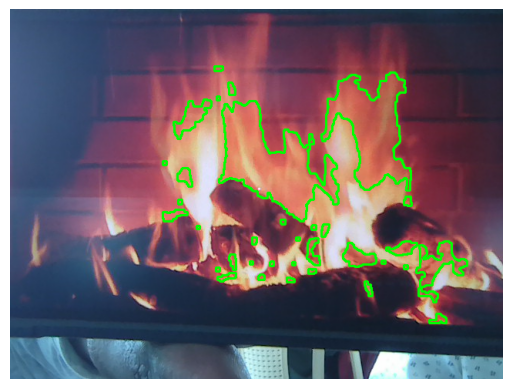

KeyboardInterrupt: 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from playsound import playsound
import os
# Initialize webcam
cap = cv2.VideoCapture(0)

# Define HSV range for detecting red color (fire)
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Path to the alert sound
alert_sound = "C:\\VI SEMESTER\\DEEP LEARNING LAB\\Video_Processing_color_based\\mixkit-classic-alarm-995.wav"

if os.path.exists(alert_sound):
    print("✅ File found!")
else:
    print("❌ File not found! Check the path.")


# Alert flag and cooldown mechanism
alert_flag = False
cooldown_frames = 100
current_cooldown = cooldown_frames
min_contour_area = 1000  # Minimum area to consider as fire

def show_image(frame):
    """Display frame using Matplotlib instead of cv2.imshow()"""
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.draw()
    plt.pause(0.1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV and apply color threshold
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Apply morphological transformations (dilation & erosion)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the thresholded mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area < min_contour_area:
            continue

        if not alert_flag and current_cooldown == cooldown_frames:
            alert_flag = True  # Set alert flag
            playsound(alert_sound)
            print("🔥 Fire Detected!")

    if alert_flag:
        current_cooldown -= 1
        if current_cooldown == 0:
            alert_flag = False
            current_cooldown = cooldown_frames  # Reset cooldown

    # Draw contours on the frame
    cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)
    
    show_image(frame)  # Use Matplotlib to display the frame

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
plt.close()  # Close the Matplotlib figure properly
